# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

(488, 653)

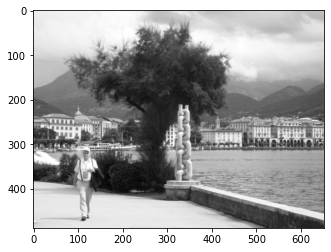

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')
img.shape

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd


U, S, VT = svd(img, full_matrices=False)

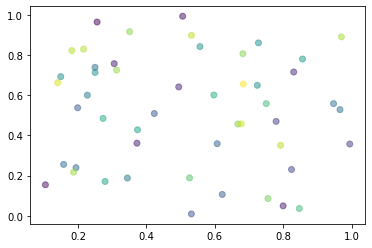

In [4]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

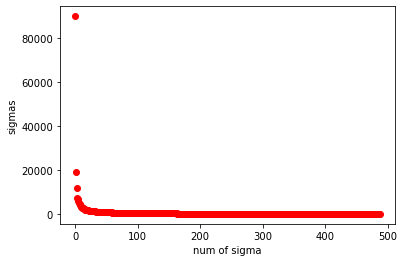

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.ylabel('sigmas')
plt.xlabel('num of sigma')
plt.plot(S, 'ro')

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

In [6]:
def get_B_K(U, S, VT, s, k):
    return S[s:k] , U[:, s:k], VT[s:k, :]

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

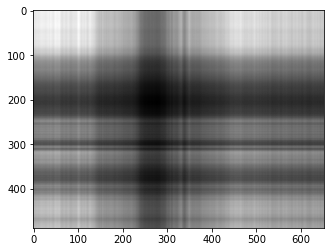

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
S1, U1, VT1 = get_B_K(U, S, VT, 0,  1)
imgplot = plt.imshow((S1 * U1) @ VT1, cmap='gray')

Вообще вроде бы совсем базовые области черного цвета остались на фото, то есть черное дерево и белые здания, но конечно, особо ничего в одноранговой матрице разглядеть нельзя, так же ожидаемо, что у нас сильно выделяются вертикальные и горизонтальные полосы (последствия одноранговости)

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

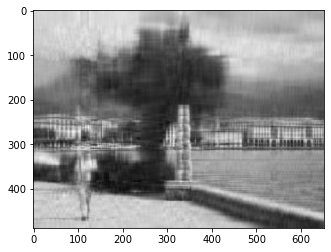

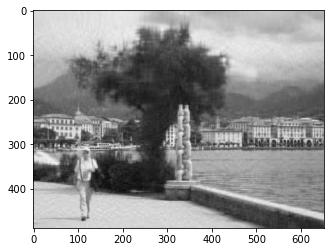

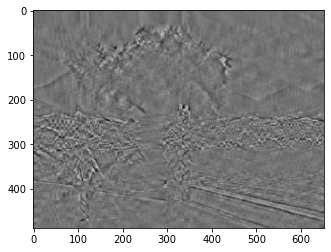

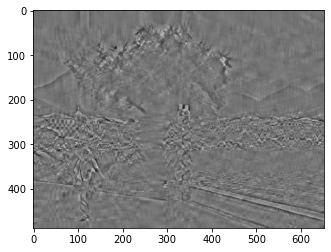

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
poses = [[0, 20], [0, 50], [20, 100], [20, len(S)]]
for [s, e] in poses:
    S1, U1, VT1 = get_B_K(U,S,VT, s, e)
    plt.imshow((S1 * U1) @ VT1, cmap='gray')
    plt.show()

Первые компоненты в разложении с самыми большими $\sigma$ хранят наиболее большие и общие детали, в то время как более мелкие хранят более мелкие детали, которые при сжатии нам хотелось бы опустить.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Я бы выбирал сжатие сохраняющее префикс компонент, так как во-первых, это наиболее бликзкая картинка(матрица) по норме Фробениуса к исходной матрице, если мы зафиксируем ранг, а, во-вторых, в наиболее больших сигма хранятся компоненты с наибольшими модулями чисел в клетках (так как матрицы $U$, $V$ ортогональны, то длины их столбцов равны $1$), а следовательно эти компоненты хранят наиболее общие закономерности. Осталось только подсчитать, какой выбор префикса мы сделаем, для этого добавим код и выберем эмпирически при помощи подсчета памяти и просмотра картинки, будем смотреть до 150, дальше уже не имеет особо смысла, так как 
сигмы совсем малы, что видно из графика.

In [9]:
#поиздеваемся над гетом, чтобы он возвращал копии матриц и getsizeof считал фактический размер.
def get_B_K(U, S, VT, s, k):
    return S[s:k].copy() , U[:, s:k].copy(), VT[s:k, :].copy()

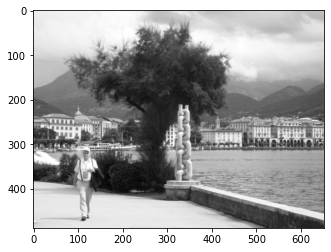


original size = 2549424
i = 5 	 SVD size = 46000	 economy = 55.422260869565214


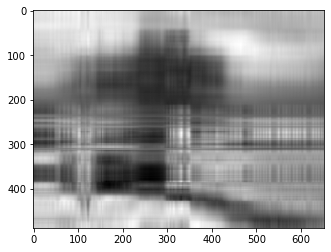

i = 10 	 SVD size = 91680	 economy = 27.807853403141362


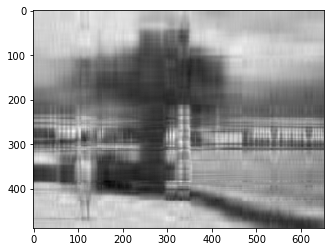

i = 15 	 SVD size = 137360	 economy = 18.560163075131044


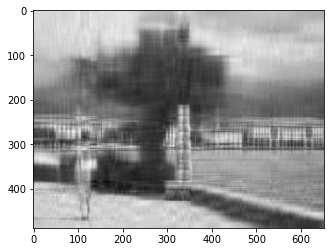

i = 20 	 SVD size = 183040	 economy = 13.928234265734266


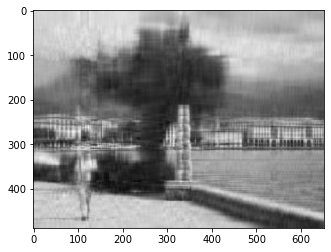

i = 25 	 SVD size = 228720	 economy = 11.146484784889822


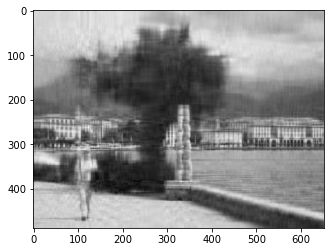

i = 30 	 SVD size = 274400	 economy = 9.290903790087464


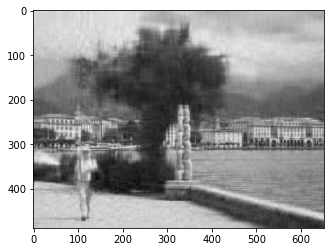

i = 35 	 SVD size = 320080	 economy = 7.964958760309923


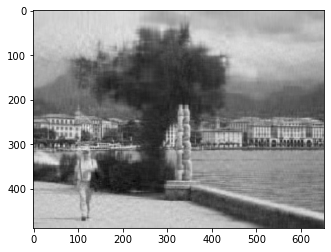

i = 40 	 SVD size = 365760	 economy = 6.970209973753281


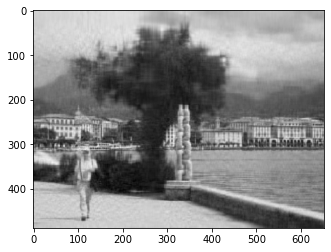

i = 45 	 SVD size = 411440	 economy = 6.196344545984834


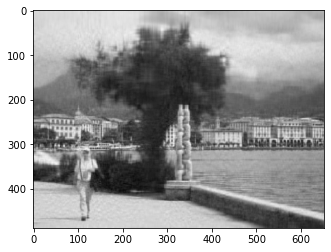

i = 50 	 SVD size = 457120	 economy = 5.577143857192859


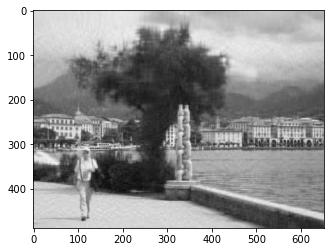

i = 55 	 SVD size = 502800	 economy = 5.070453460620525


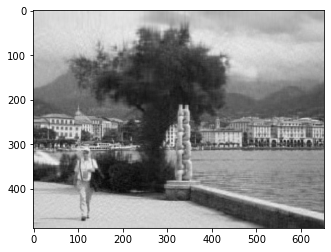

i = 60 	 SVD size = 548480	 economy = 4.6481621936989495


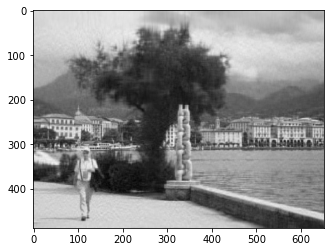

i = 65 	 SVD size = 594160	 economy = 4.290803823885822


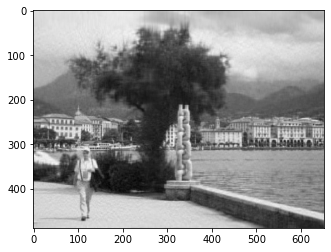

i = 70 	 SVD size = 639840	 economy = 3.984471117779445


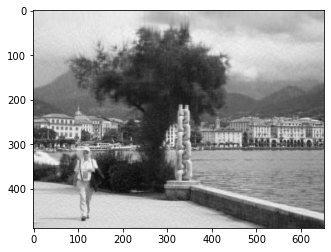

i = 75 	 SVD size = 685520	 economy = 3.7189637063834753


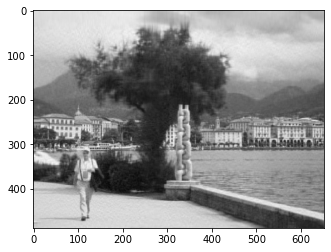

i = 80 	 SVD size = 731200	 economy = 3.4866301969365425


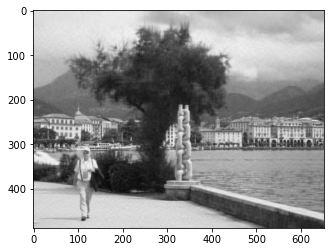

i = 85 	 SVD size = 776880	 economy = 3.2816187828236023


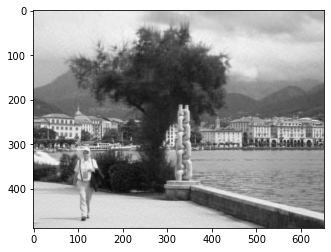

i = 90 	 SVD size = 822560	 economy = 3.099377553005252


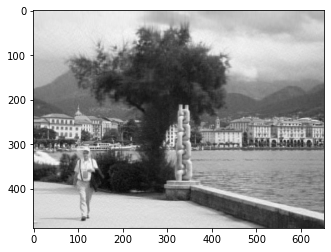

i = 95 	 SVD size = 868240	 economy = 2.9363125403114347


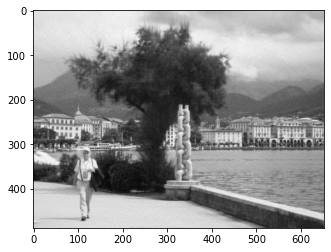

i = 100 	 SVD size = 913920	 economy = 2.7895483193277313


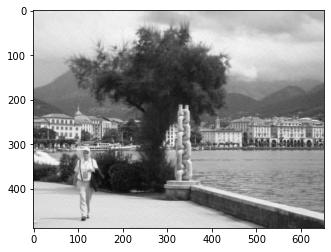

In [10]:
from sys import getsizeof
img_size = getsizeof(img)
plt.imshow(img, cmap='gray')
plt.show()
print()
print (f'original size = {img_size}')
for i in range(5, 105, 5):
    S1, U1, VT1 = get_B_K(U, S, VT, 0, i)
    sub_img_size = getsizeof(S1) + getsizeof(U1) + getsizeof(VT1)
    print(f'i = {i} \t SVD size = {sub_img_size}\t economy = {img_size/sub_img_size}')
    plt.imshow((S1 * U1) @ VT1, cmap='gray')
    plt.show()

Я не вводил тут метрики качества, поэтому просто скажу, что в зависимости от того, насколько мы ценим память или качество, разумно выбрать от $50$ до $100$ компонент.

$\text{getsizeof}$ возвращает размер объекта в байтах, будем считать, что int это констнанта байт.

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
Вообще наивное хранение всей матрицы как просто матрицы занимает $O(nm)$, если разложить ее в усеченное $SVD$, то мы будем хранить вектор длины $\min(m,k)$ и матрицы размера минимум в квадрате. Если мы будем сжимать при помощи $SVD$ сохраняя первые $k$ сигм, то мы будем хранить только $k$ столбцов/строк из обеих матриц и также $k$, чисел. В итоге, что мы кажется, что если хранить сжатое изображение как просто матрицу мы не будем чего либо экономить, а если в качестве разложения, то мы получим линейный от $k$ размер по памяти. В итоге при малых $k$ мы получаем увеличение практически в $\min(n, m)$ раз, в то время как при больших, издержки от хранения больших матриц перевешивают плюсы SVD.

Тогда при $i = 100$ мое предположение, что размер $SVD$ равен: $653* 100 + 488 * 100 + 100 = 114'200$, в то время как 
исходная матрица имеет размер $653 * 488 = 318'664$, тогда экономия должна быть в $2.790$ раз

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

Из графиков выше, видно и вычислений, что мое приближение оказалось очень точным, и мои расчеты правильны. Следовательно, наивные аппроксимации экономии вполне себе годятся.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Докажем, для обычного $SVD$, а не усеченного, так удобнее в нашем случае, а итоговые матрицы они дают одни и те же так что доказательство для одного автоматически является доказательством и для другого, тогда $X = U \Sigma V^T$, где $U, V$ -- квадратные ортогональные матрицы. Будем, считать, что мы находимся в стандартных для $\mathbb{R}^n, \mathbb{R}^m$ ортонормированных базисах. Теперь рассмотрим $X$ как некоторое отображение из $\mathbb{R}^n$ в $\mathbb{R}^m$,  так как 
$X = U \Sigma V^T$, верно, что $X$ это композиция из операторов, заданных матрицами $U, V^T$ (в соответствующих пространствах), а также отображения $\Sigma$. Причем операторы заданные $U, V^T$ являются движениями, то есть сохраняют длины, так как матрицы ортогональны. Тогда перейдем к доказательству.

$$\max_w \frac{|U \Sigma V^T w|}{|w|} = \max_w \frac{|\Sigma V^T w|}{|w|}$$

В силу того, что $V^T$ обратимо, то матрица задает биекцию, причем в силу ортогональности она сохраняет длины, тогда 
посмотрим на $v = V^T w$ и перейдем к рассмотрению $v$, мы можем расмотреть любой вектор в качестве $v$,выбрав $w = V v$, тогда:

$$\max_w \frac{|\Sigma V^T w|}{|w|} = \max_v \frac{|\Sigma v|}{|v|} = \max_v \frac{\sqrt{\sigma^2_1 v^2_1 + ...  + \sigma_r^2 v^2_r + 0 \cdot v^2_{r+1} + ... + 0\cdot v^2_{n} }}{\sqrt{ v_1^2 + ...  +  v^2_n}} \leq 
\frac{\sqrt{\sigma^2_1 v^2_1 + ...  + \sigma_1^2 v^2_r + \sigma_1^2 \cdot v^2_{r+1} + ... + \sigma_1^2\cdot v^2_{n} }}{\sqrt{ v_1^2 + ...  +  v^2_n}} = \sigma_1
$$

Причем максимум очевидно достигается при фиксированной норме, если $v = (a,0,...,0), a = |v|$

$|w| = 1$ -- частный случай, максимум на частном случае не больше, чем на всем множестве, причем максимум достигается при $v = (1,0,..,0)$ (тот же трюк, с сохранением длин и биекции, что и выше).

Теперь смотрим на $$\max_{|u| = 1, |w| = 1} |u^T X v| = 
\max_{|u| = 1, |w| = 1} |(U^Tu)^T \Sigma (V^T v)| = \max_{|x| = 1, |y|= 1} |y^T \Sigma x| = 
\max_{|x| = 1, |y|= 1} \sqrt{\sum_{i = 1}^m y_i^2 \cdot(\sum_{j = 1}^n \sigma^2_j x^2_j } = 
\max_{|x| = 1, |y|= 1}  \sqrt{\sum_{i = 1}^m \sum_{j = 1}^n (y_i^2 \sigma^2_j x^2_j) }
\leq \max_{|x| = 1, |y|= 1} \sigma_1 \sqrt{\sum_{i = 1}^m \sum_{j = 1}^n (y_i^2 x^2_j)} = 
\max_{|x| = 1, |y|= 1} \sigma_1 \sqrt{\sum_{i = 1}^m y_i^2 \sum_{j = 1}^n (x^2_j)} = 
\max_{|x| = 1, |y|= 1} \sigma_1 \sqrt{\sum_{i = 1}^m y_i^2 |x|^2} = 
\max_{|x| = 1, |y|= 1} \sigma_1 \sqrt{|y|^2 |x|^2} = \sigma
$$

Максимум очевидно достигается, если в $x,y$ мы поставим в первую координату 1, в другие 0, во втором равенстве мы опять использовали то, что у нас ортогональные матрицы задают движение.


**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$$A = \left(\begin{array}{c} \sin(0)\\ \vdots \\ \sin(n - 1)\end{array}\right) \cdot 
\left(\cos(0), \ldots, \cos(n-1)\right)$$

Тогда ранг, не больше, чем $1$, но $\sin(1) \cos(1) \ne 0$, следовательно ранг 1.

Теперь, заметим, что наша матрица, уже похожа на компактное SVD, только матрицы $U, V^T$ не являются ортогональными. Для ортогональности $U, V$ достаточно отнормировать $U, V$ (это столбики), займемся этим.

С семинаров по комплексным числам, мы знаем, что:

$$\sum_{k = 1}^n \cos(kx) = \frac{\sin\left(\dfrac{nx}{2} \right) \cos\left(\dfrac{(n + 1)x}{2} \right) }{\sin\left(\dfrac{x}{2} \right)}$$

$$||U||^2 = \sum_{k = 1}^{n-1} \sin^2(k) = \sum_{k = 1}^{n - 1} \left(\frac{1}{2} - \frac{\cos(2k)}{2} \right) = 
\frac{n - 1}{2} - \frac{1}{2} \left(\sum_{k = 1}^{n - 1}\cos(2k) \right) = \frac{n - 1}{2} - \frac{1}{2} 
\frac{\sin\left(n - 1 \right) \cos\left(n \right) }{\sin\left(1\right)}
$$

$$ ||V||^2 = \sum_{k = 0}^{n-1} \cos^2(k) = 1 + \sum_{k = 1}^{n-1} \cos^2(k) = 1 + \frac{n - 1}{2} + 
\frac{1}{2} \left(\sum_{k = 1}^{n - 1}\cos(2k) \right) =  \frac{n - 1}{2} + \frac{1}{2} 
\frac{\sin\left(n - 1 \right) \cos\left(n \right) }{\sin\left(1\right)}$$

Теперь $a = ||U||, b = ||V||$, тогда посмотрим на это равенство.

Тогда : 
$$A = \left(\begin{array}{c} \sin(0)\\ \vdots \\ \sin(n - 1)\end{array}\right) \cdot 
\left(\cos(0), \ldots, \cos(n-1)\right)  = \left(\begin{array}{c} \sin(0) / a\\ \vdots \\ \sin(n - 1) / a\end{array}\right) \cdot a b \cdot \left(\cos(0)/b, \ldots, \cos(n-1)/b\right)$$

где $\sigma_1 = a\cdot b$, а $U, V^T$ написаны по бокам.

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

На диагонали $\Sigma$ стоят (по порядку) $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r > 0$.

Для начала, в силу, того, размерность образа равна $\text{rk} A = r$, размерность ядра равна тогда $n - r$,матрицы $U, V^T$ невырождены, поэтому их столбцы/строки линейно независимы.

Теперь покажем, что все $u_1, ... , u_r$ лежат в образе, а далее из равенства размерностей будет следовать, что их линейная оболочка равна образу.

Рассмотрим $e_j$ вектор, где стоят все единицы, кроме $j$-ой позиции там единица, тогда посмотрим на $w_j = V \frac{1}{\sigma_j} e_j, j \leq r$.

$$A w_j = U \Sigma V^T V \frac{1}{\sigma_j} e_j = U f_j = u_j$$

$f_j$ это вектор $m \times m$, такой, что в нем везде нули, кроме $j$-ой позиции, там единица.

Таким образом, мы показали, что $u_j \in \text{Im} \mathcal{A}$, а равенство размерностей подсказывает нам, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$.

Теперь покажем, что $i > r \Rightarrow v_i \in \text{Ker} \mathcal{A}$

В силу того,что матрица $V^T$ ортогональна, то $V^T v_i = e_i$, где $e_i$ -- вектор определенный выше,  $\Sigma e_i = 0, \text{если } i > r$,  поэтому $i > r \Rightarrow v_i \in \text{Ker} \mathcal{A} \langle v_{r +1}, \ldots , v_n\rangle$ верно, поэтому из равенства размерностей опять следует искомое равенство: $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Рассмотрим $A = U \Sigma V^T$ полное SVD матрицы $A$, тогда:

$$ P = U \Sigma V^T \left(\left( U \Sigma V^T\right)^T U \Sigma V^T  \right)^{-1} \left( U \Sigma V^T\right)^T = 
U \Sigma V^T \left( V \Sigma^T U^T U \Sigma V^T  \right)^{-1} V \Sigma^T U^T = 
U \Sigma V^T \left( V \Sigma^T \Sigma V^T  \right)^{-1} V \Sigma^T U^T
$$

Теперь, так как матрица $A$ имеет ранг $n$, то матрица $\Sigma^T \Sigma = \text{diag}(\sigma^2_1, ... , \sigma^2_n)$ обратима, как и $V$, тогда $(\Sigma^T \Sigma)^{-1} = B = \begin{pmatrix}
\frac{1}{\sigma^2_{1}} & & &\\
 & \frac{1}{\sigma^2_{2}} & &  \\
 & & \ddots & \\
 & & & \frac{1}{\sigma_n^2}
\end{pmatrix}$

$$U \Sigma V^T \left( V \Sigma^T \Sigma V^T  \right)^{-1} V \Sigma^T U^T = 
U \Sigma V^T V B V^T V \Sigma^T U^T = U \Sigma B  \Sigma^T U^T = 
U\begin{pmatrix}
E & 0\\
0 &0
\end{pmatrix} U^T $$

То что : $ \Sigma B  \Sigma^T = \begin{pmatrix}
E & 0\\
0 &0
\end{pmatrix}$ проверяется блочным умножением матриц

Таким образом, искомое SVD: $U\begin{pmatrix}
E & 0\\
0 &0
\end{pmatrix} U^T$, $U$ -- ортогональная матрица

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


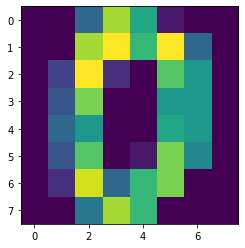

In [11]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [12]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
data = digits.data
U, S, Vt = svd(data, full_matrices=False)
data.shape
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

In [13]:
def to_color(arr):
    cols = ['b', 'g', 'c', 'r', 'm', 'y', 'k', 'tab:orange', '#8e018f', '#95eee3']
    ans = []
    for c in arr:
        ans.append(cols[c])
    return ans


[]

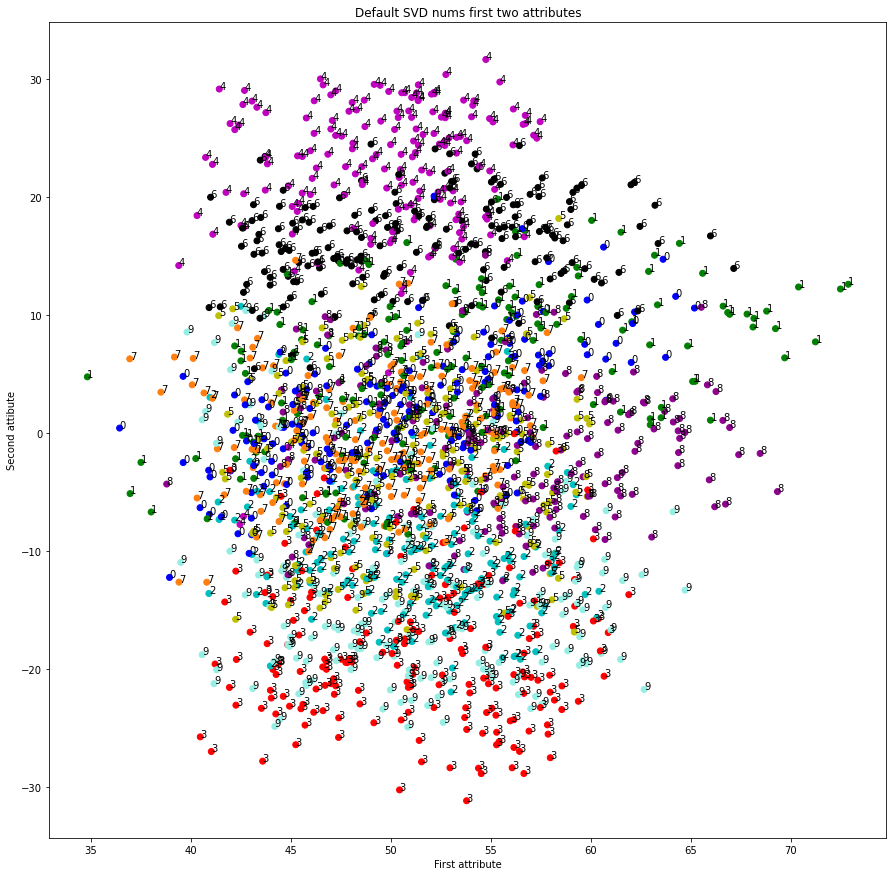

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tar = digits.target
P = U * S
colors = to_color(tar)
plt.figure(figsize=(15, 15))
plt.title('Default SVD nums first two attributes')
plt.scatter(P[:, 0:1], P[:, 1:2], c = colors)
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
for i in range(0, len(P)):
    plt.annotate(tar[i], (P[i, 0], P[i, 1]))
plt.plot()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

[]

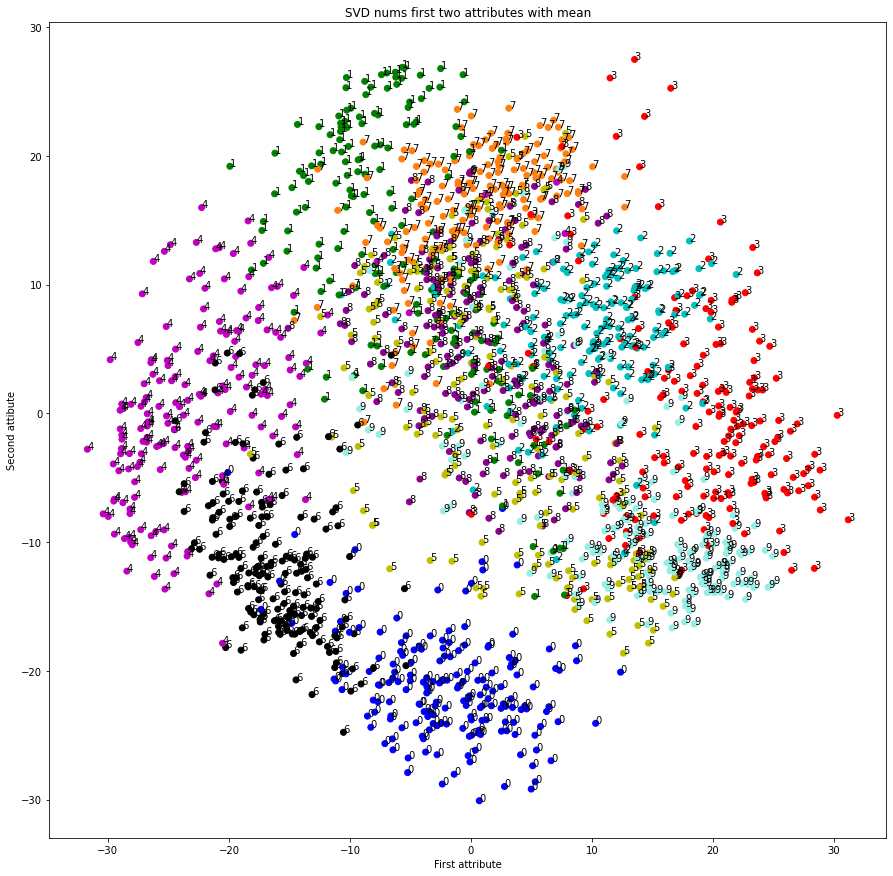

In [388]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data1 = data.copy()
mean = data1.mean(axis = 0)
mean * np.ones(data1.shape)
data1 -= mean
U, S, Vt = svd(data1, full_matrices=False)
P = U * S
plt.figure(figsize=(15, 15))
plt.scatter(P[:, 0:1], P[:, 1:2], c = colors)
plt.title('SVD nums first two attributes with mean')
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
for i in range(0, len(P)):
    plt.annotate(tar[i], (P[i, 0], P[i, 1]))
plt.plot()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Видно, что новая визуализация намного лучше разбивает данные на кластеры, и построение модели, классифицирующей различные числа намного лучше на второй визуализации, чем на первой.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

[]

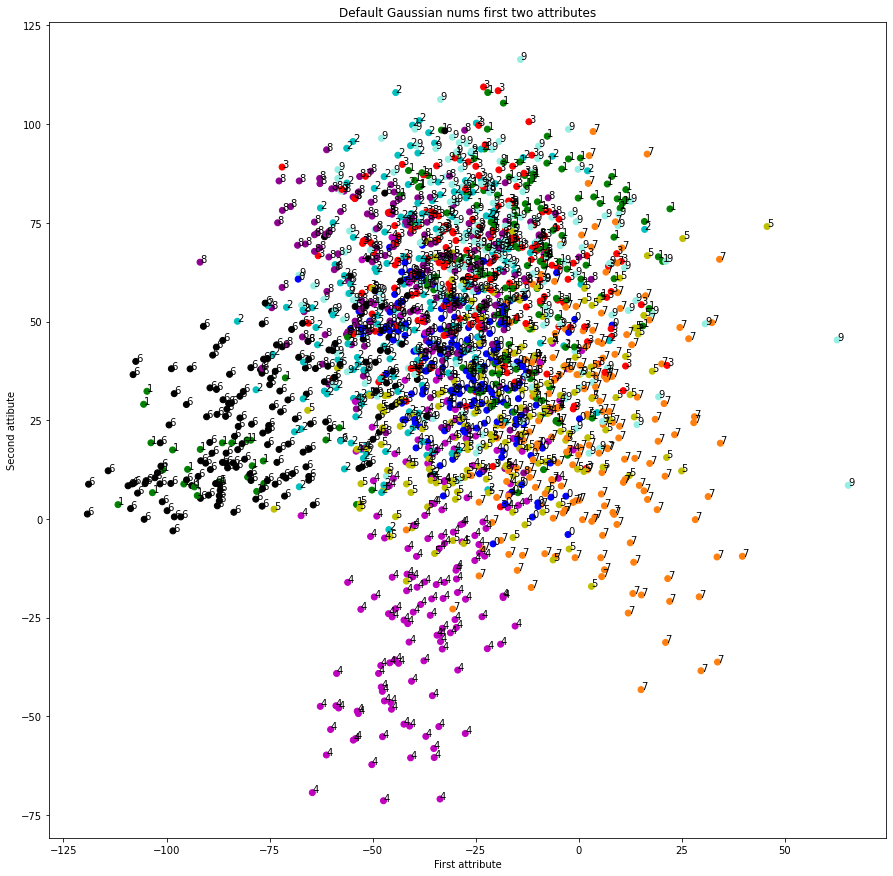

In [389]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.random_projection import GaussianRandomProjection
rng = np.random.RandomState(32)
data1 = digits.data
transformer = GaussianRandomProjection(n_components = 2, random_state = rng)
new_data = transformer.fit_transform(data1)
plt.figure(figsize=(15, 15))
plt.scatter(new_data[:, 0:1], new_data[:, 1:2], c = colors)
plt.title('Default Gaussian nums first two attributes')
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
for i in range(0, len(new_data)):
    plt.annotate(tar[i], (new_data[i, 0], new_data[i, 1]))
plt.plot()

Примерно так же, в центре намешано все подряд, что затрудняет анализ, при этом, есть некоторые вразумительные хвосты, как и при SVD без нормировки.

Поэтому давайте теперь посмотрим на  случайные гауссовы проекции на матрицы, из которой вычли среднее.




[]

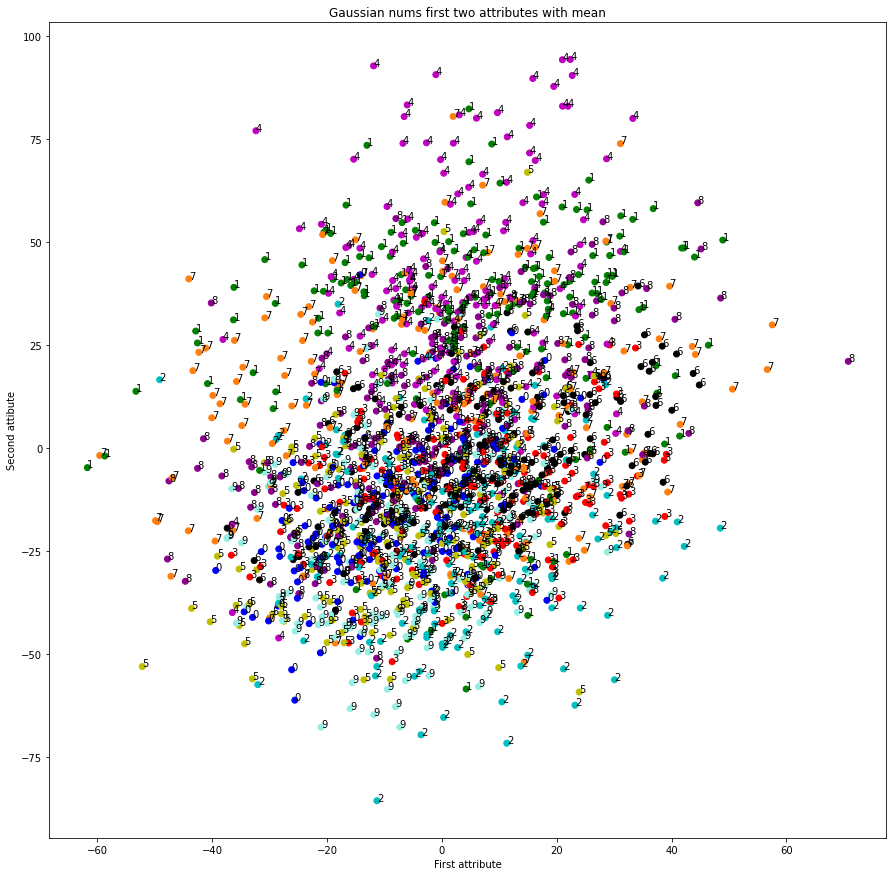

In [390]:
mean = data1.mean(axis = 0)
mean * np.ones(data.shape)
data1 -= mean
#transformer = GaussianRandomProjection(n_components = 2, random_state = rng)
new_data = transformer.fit_transform(data1)
plt.figure(figsize=(15, 15))
plt.scatter(new_data[:, 0:1], new_data[:, 1:2], c = colors)
plt.title('Gaussian nums first two attributes with mean')
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
for i in range(0, len(new_data)):
    plt.annotate(tar[i], (new_data[i, 0], new_data[i, 1]))
plt.plot()

Как видно, эта шутка в данном случае справляется хуже, чем в случае с SVD от матрицы, из которой вычли среднюю.
Так же случайные гауссовы проекции совсем не работают для сжатия фотографий, при попытке сжатии происходит какой-то гигакринж

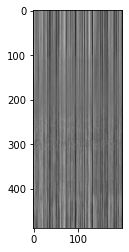

In [391]:
transformer = GaussianRandomProjection(n_components = 200, random_state = rng)
new_im = transformer.fit_transform(img)
imgplot = plt.imshow(new_im, cmap='gray')
#меняя параметр n мы можем регулировать ширину кринжа.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [392]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

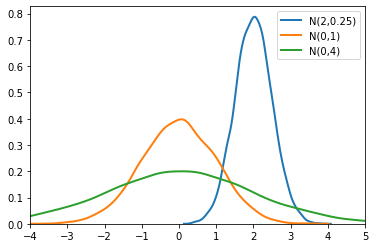

In [393]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$$ p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = c, c> 0$$

Начнем делать равносильные переходы, и посмотрим, что их этого выйдет, но для начала замена: $z = x - a$, это просто сдвиг, он никак не влияет на ортогональность, поэтому будем теперь считать, что мы работает со стандартным базисом, выходящим из нуля.

$$ e^{-\frac12z^T\Sigma^{-1}z} = (2\pi)^{n/2}|\Sigma|^{1/2} c \quad z^T \Sigma^{-1} z = -2\ln\left((2\pi)^{n/2}|\Sigma|^{1/2} c \right) $$

Теперь на лекции мы доказывали, что любая симметрическая матрица может задавать самосопряженный оператор, а самосопряженный оператор диагонализируется в ортонормированном базисе. $(\Sigma^{-1})^T = (\Sigma^T)^{-1} = \Sigma^{-1} = PDP^T$, поэтому существует базис $e'_1, ..., e'_n$, в котором матрица диагональная, причем в силу положительной определенности все собственные значения (они на диагонали) положительны. Пусть $y$, это координаты $z$ в новом диагонализирующем базисе.

Тогда: 

$$y_1^2 \sigma_1^2 + ... + y_n^2 \sigma_n^2= -2\ln\left((2\pi)^{n/2}|\Sigma|^{1/2} c \right) \quad 
\sum_{i=1}^n \frac{y_i^2}{\mu^2_i} = -2\ln\left((2\pi)^{n/2}|\Sigma|^{1/2} c \right) = K$$

Где $\mu_i = \frac{1}{\sigma_i}$.

Если $K > 0$, то можно поделить все, на $K$ и мы получим искомое представление, только коэффициент при $y^2_i$ будет равен: 
$\frac{1}{(\mu_i \sqrt{K})^2}$

Если $K < 0$, то мы крутые, решений нет.

Если $K = 0$, то едиственное решение: $y = 0$.

Таким образом, я описал процесс перехода к координатам, в которых наблюдается искомый вид.

**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Поскольку $\Sigma$ симметрическая матрица, то существует ортонормированный базис, в котором эта матрица диагональна, то есть:

$$\Sigma = P^T D P, \text{где } D = \begin{pmatrix}
\sigma^2_{1} & & &\\
 & \sigma^2_2 & &  \\
 & & \ddots & \\
 & & & \sigma^2_n
\end{pmatrix}, \text{причем} \det \Sigma = \prod_{i = 1}^n \sigma_i^2 $$

Все $\sigma_i > 0$ в силу положительной определенности матрицы.

Тогда:
$$\Sigma^{-1} = P^T D^{-1} P = P^T
\begin{pmatrix}
\frac{1}{\sigma^2_{1}} & & &\\
 & \frac{1}{\sigma^2_2} & &  \\
 & & \ddots & \\
 & & & \frac{1}{\sigma^2_n} 
\end{pmatrix} P$$


Теперь посмотрим, на $(x-a)^T \Sigma^{-1} (x - a) = \left(P(x-a) \right)^T D^{-1} P (x-a)$. Посмотрим, куда переходит $P(x-a)$.

Пусть матрица $\Sigma$ была матрицей некоторого сопряженного оператора в стандратном базисе, тогда, переходя к новому базису $e' = eP^T$, получаем, что матрица в новых координатах равна $D = P \Sigma P^T$, тогда матрица $P^T$ переводит новые координаты в старые, а $P$ старые в новые, тогда $P(x -a) = Px - Pa = y - b$, где $y$ -- координаты $x$ в новом базисе, а $b$ координаты $a$ в новом базисе.

Тогда теперь посмотрим на:
$$\left(P(x-a) \right)^T D^{-1} P (x-a) = (y - b)^T D^{-1} (y - b) = 
\sum_{i = 1}^n (y_i - b_i)^2 \cdot \frac{1}{\sigma^2_i}$$, тогда:

$$ p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = 
\frac1{(2\pi)^{n/2}\sqrt{\prod_{i = 1}^n \sigma_i^2} } e^{-\frac12 \left(\sum_{i = 1}^n (y_i - b_i)^2 \cdot \frac{1}{\sigma^2_i} \right)} = \prod_{i = 1}^n \frac1{\sqrt{2\pi\sigma_i^2}}e^{-\frac{(y_i - b_i)^2}{2\sigma_i^2}} $$

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

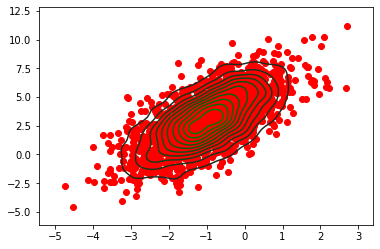

In [406]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [395]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

$X = U \Sigma V^T$, тогда пусть нам заданы изначальные координаты (базис) $e$, тогда $U \Sigma$ есть координаты тех же признаков в некотором новом базисе. Тогда $V$ переводит новые координаты в старые, а $V^T$ наоборот старые в новые.

Тогда чтобы узнать какая линейная комбинация признаков задает первый столбец в $U \Sigma$ надо найти такой вектор $v$, что $\left(\begin{array}{c} 1 \\ 0 \end{array} \right) = V^T v, v = V \left(\begin{array}{c} 1 \\ 0 \end{array} \right)$

Тогда координаты первого признака в старом базисе это первый столбец $V$, а координаты второго -- второй столбец.

SVD нам выдает транспонированную $V$, поэтому мы должны смотреть на строки.

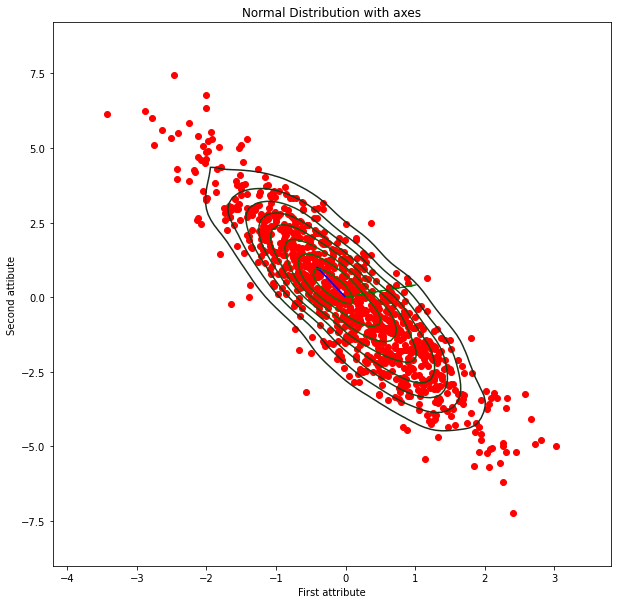

In [396]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.title("Normal Distribution with axes")
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(0,0, VT[0,0], VT[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(0,0, VT[1,0], VT[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')

**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Давайте искать. Начнем с хармногочлена.

$$ \chi_{\Sigma}(t) =  \left| \begin{array}{cc} 1 - t & -2 \\ -2 & 5 -t \end{array} \right| = 
(t-1)(t-5) - 4 = t^2 - 6t + 1
$$

Его корни:

$$ \lambda_{1,2} = \frac{6 \pm 4 \sqrt{2}}{2} = 3 \pm 2 \sqrt{2}$$

Ищем собственные вектора.

$$
\left( \begin{array}{cc} -2-2\sqrt{2} & -2 \\ -2 & 2 - 2\sqrt{2} \end{array} \right) = 
-2 \left( \begin{array}{cc} 1+\sqrt{2} & 1 \\ 1 &  \sqrt{2} - 1 \end{array} \right)
$$


Тогда собственный вектор: $e_1 = \left( \begin{array}{c}1\\ -1-\sqrt{2} \end{array} \right)$, с нормировкой 
$e'_1 = \frac{1}{\sqrt{4 + 2\sqrt{2}}}  \left( \begin{array}{c}1\\ -1-\sqrt{2} \end{array} \right)$


Теперь ищем второй.
$$
\left( \begin{array}{cc} -2+2\sqrt{2} & -2 \\ -2 & 2 +2\sqrt{2} \end{array} \right) = 
2 \left( \begin{array}{cc} -1+\sqrt{2} & -1 \\ -1 & 1 +\sqrt{2} \end{array} \right)
$$

Второй собственный вектор: $ e_2 =\left( \begin{array}{c}1\\ \sqrt{2} - 1 \end{array} \right)$, с нормировкой:
$e'_2 = \frac{1}{\sqrt{4 - 2 \sqrt{2}}} \left( \begin{array}{c}1\\ \sqrt{2} - 1 \end{array} \right)$

Тогда $$$P = (e_1|e_2)$, тогда $\begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix} = P \begin{pmatrix}
3 + 2\sqrt{2} & 0\\
0 & 3 - 2\sqrt{2}
\end{pmatrix}$$

Теперь посмотрим на это, как на направления элипса. 

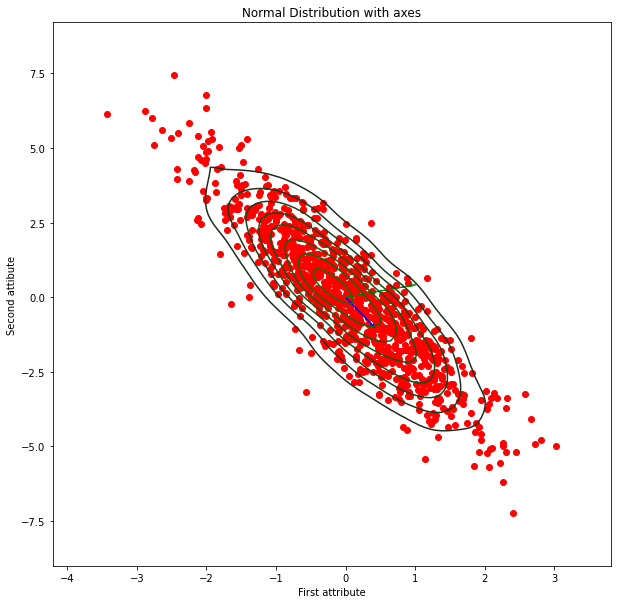

In [397]:
dot1 = 1/(np.sqrt(4 + 2 * np.sqrt(2))) * np.array([1, - 1 - np.sqrt(2)])
dot2 = 1/(np.sqrt(4 - 2 * np.sqrt(2))) * np.array([1, np.sqrt(2) - 1])
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.title("Normal Distribution with axes")
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(0,0, dot1[0], dot1[1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(0,0, dot2[0], dot2[1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные  результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

Cov_matr = $ \left( \begin{array}{cc} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 
-\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{array} \right)\left( \begin{array}{cc} 0.01& 0 \\ 
0 & 2 \end{array} \right)\left( \begin{array}{cc} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ 
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{array} \right) =\left( \begin{array}{cc} 1.005 & 0.995 \\ 
0.995 & 1.005 \end{array} \right) $

[]

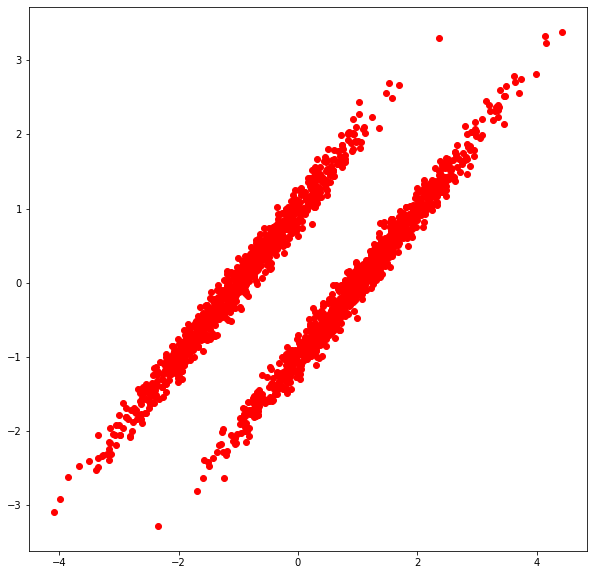

In [398]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
covr = [[1.005,0.995],[0.995, 1.005]]
X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=covr, size=N)
X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=covr, size=N)
X = np.concatenate((X1, X2))
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
plt.plot()

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

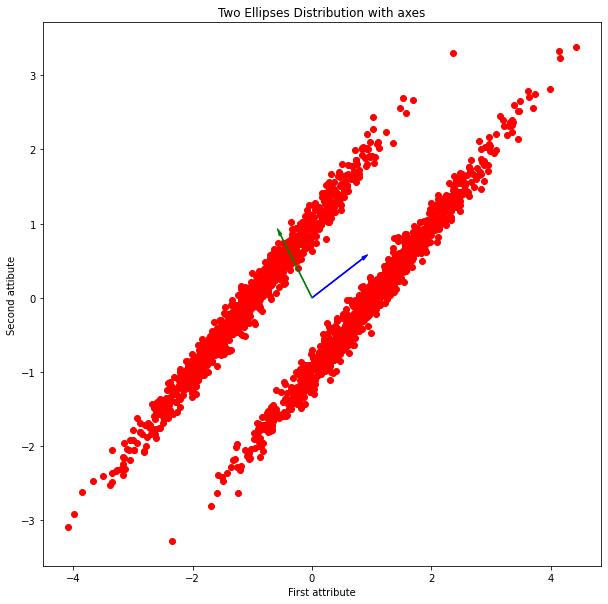

In [399]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
plt.title("Two Ellipses Distribution with axes")
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(0,0, VT[0,0], VT[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(0,0, VT[1,0], VT[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')

[]

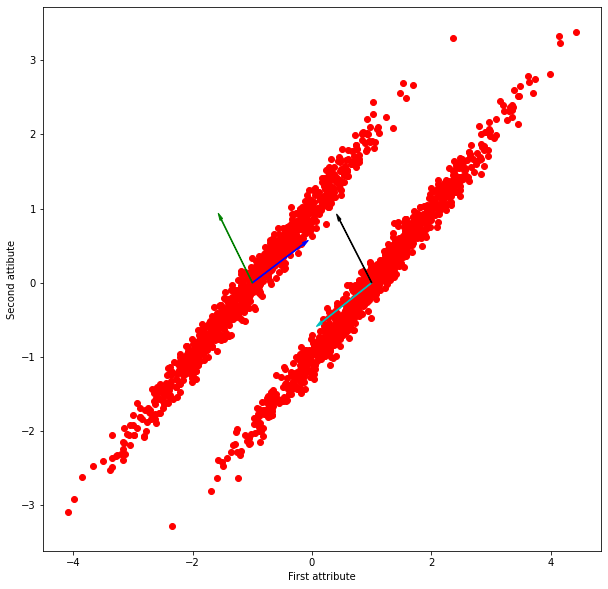

In [400]:
#Если вы хотите признаки для каждого эллипса.
U1, S1, VT1 = svd(X1, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(-1,0, VT1[0,0], VT1[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(-1,0, VT1[1,0], VT1[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')
U2, S2, VT2 = svd(X2, full_matrices=False)
plt.arrow(1,0, VT2[0,0], VT2[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'c')
plt.arrow(1,0, VT2[1,0], VT2[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'black')
plt.plot()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
Нет, они не помогают.  Первые два общие признака пытаются мерить наибольшее направление изменения относительно всей выборки, то поскольку 
эллипсы схожи по параметрам, SVD никак не замечает, что у нас 2 непересекающихся эллипса и считает, что наше главное изменение (первый признак) происходит относительно прямой под углом 45 градусов, второй же признак уже более похож на подходящий для классификации, но опять же, скорее всего это возникает из-за параллельности, если бы у нас были бы 2 непересекающихся, непараллельных эллипса, то с большой вероятностью второй признак бы тоже показывал не тот результат, который нам хотелось бы.

Вторые (отдельные для каждого эллипса) же признаки вообще показывают изменения внутри одного эллипса и ничего не знают о втором. 
В итоге, оба варианта достаточно плоховаты, надо придумывать другие модели для классификации.

In [401]:
# Just keep this image as a sample Я его убил, плак-плак:(

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

[]

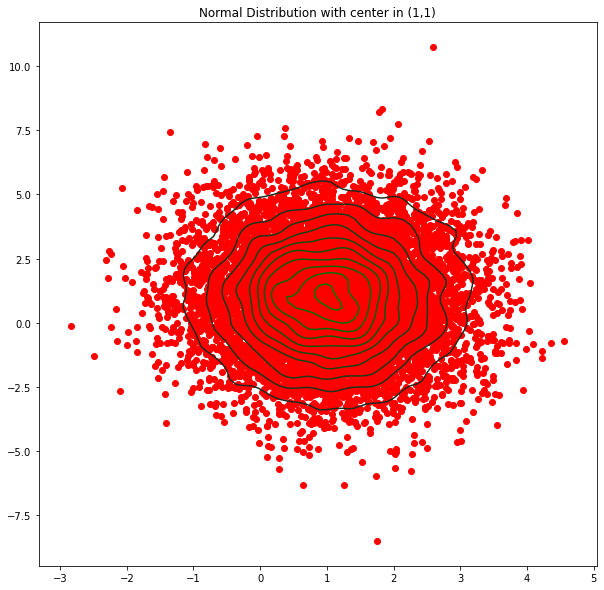

In [411]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cov = np.array([[1,0],[0,4]])
X = np.random.multivariate_normal(mean=np.array([1,1]), cov=cov, size=10000)
plt.figure(figsize=(10, 10))
plt.title('Normal Distribution with center in (1,1)')
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.plot()

**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Матрица уже в виде SVD, так что скорее всего наиболее интересными направлениями, будут как раз вектора стандартного базиса, так как в SVD выделяются те признаки относительно, которых наибольшая вариация.

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

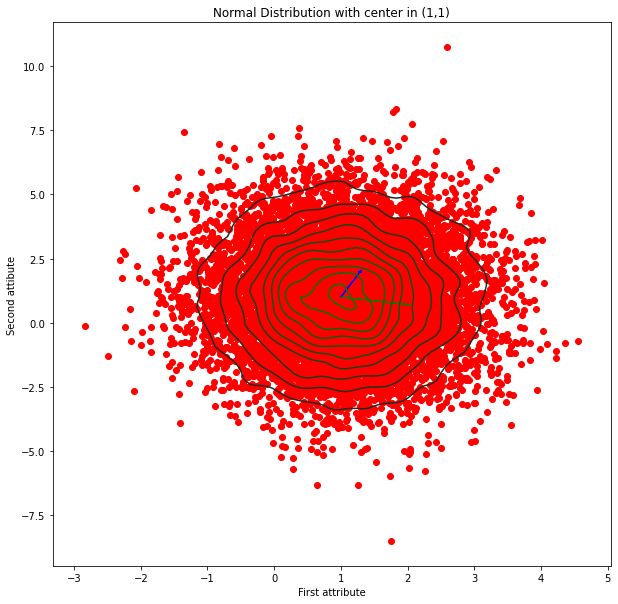

In [412]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.title("Normal Distribution with center in (1,1)")
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(1,1, VT[0,0], VT[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(1,1, VT[1,0], VT[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')

**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Проблемы возникают, из-за того, что при доказательстве всех утверждений про SVD мы преполагали, что мы считаем все изменения относительно начала координат. если мы поставим стрелочки в данном нам графике в $(0,0)$, то мы дейстивтельно получим ожидаемые стрелочки направления наибольших изменений, относительно $(0,0)$.

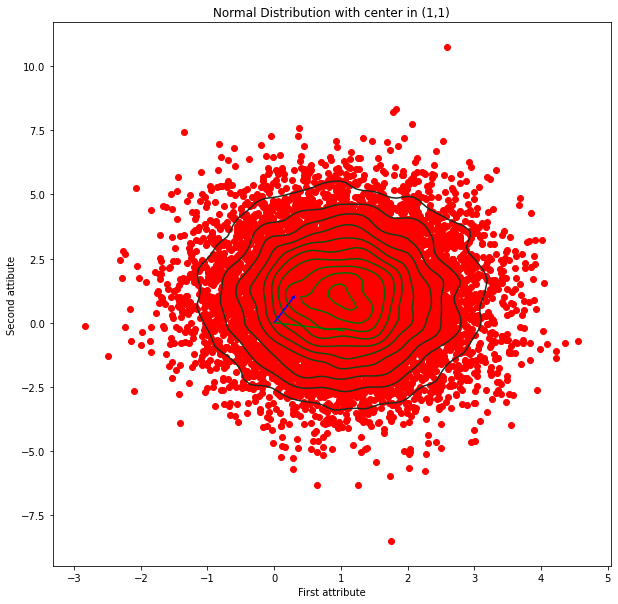

In [413]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.title("Normal Distribution with center in (1,1)")
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(0,0, VT[0,0], VT[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(0,0, VT[1,0], VT[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')

Решением данной проблемы является вычитание среднего и тогда мы уже будем рассматривать отклонение на исходной выборк относительно среднего, а не относительно $(0,0)$

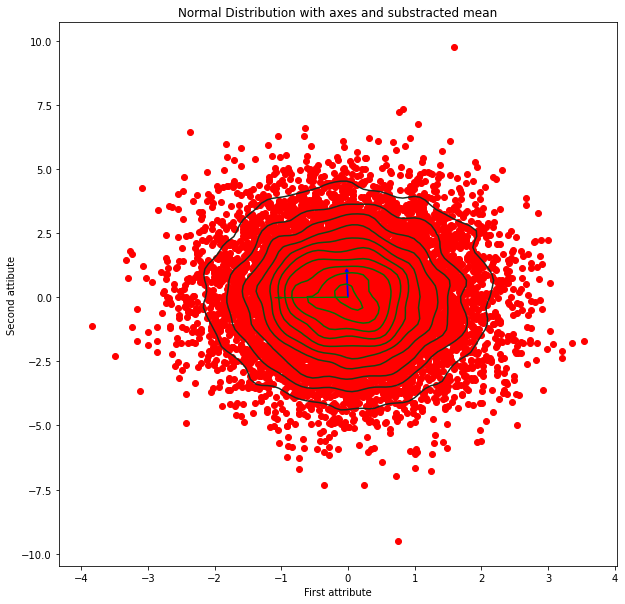

In [414]:
X = X.copy()
mean = X.mean(axis = 0)
X -= np.ones(X.shape) * mean
U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.title("Normal Distribution with axes and substracted mean")
plt.xlabel('First attribute')
plt.ylabel('Second attibute')
plt.arrow(0,0, VT[0,0], VT[0,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'b')
plt.arrow(0,0, VT[1,0], VT[1,1], width = 0.01, head_width=0.05, head_length=0.1, color = 'g')

А вот это уже неплохо, получили ожидаемый результат.